**IMPORTING LIBRARIES**

In [21]:
import numpy as np
import pandas as pd
import datetime

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')
plt.rc('figure', figsize=(16,10))
plt.rc('lines', markersize=4)
import pandas_datareader as web

**READING DATA FROM YAHOO FINANCE SOURCE**

In [22]:
data=web.DataReader('MSFT',data_source='yahoo',start='2012-01-01',end='2021-05-15')
data


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,26.959999,26.389999,26.549999,26.770000,64731500.0,21.799267
2012-01-04,27.469999,26.780001,26.820000,27.400000,80516100.0,22.312283
2012-01-05,27.730000,27.290001,27.379999,27.680000,56081400.0,22.540291
2012-01-06,28.190001,27.530001,27.530001,28.110001,99455500.0,22.890448
2012-01-09,28.100000,27.719999,28.049999,27.740000,59706800.0,22.589146
...,...,...,...,...,...,...
2021-05-10,251.729996,247.119995,250.869995,247.179993,29299900.0,247.179993
2021-05-11,246.600006,242.570007,244.550003,246.229996,33641600.0,246.229996
2021-05-12,244.380005,238.070007,242.169998,239.000000,36684400.0,239.000000


**STATISTICAL DESCRIPTION OF DATA**

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2357 entries, 2012-01-03 to 2021-05-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2357 non-null   float64
 1   Low        2357 non-null   float64
 2   Open       2357 non-null   float64
 3   Close      2357 non-null   float64
 4   Volume     2357 non-null   float64
 5   Adj Close  2357 non-null   float64
dtypes: float64(6)
memory usage: 128.9 KB


In [24]:
data.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2357.000000,2357.000000,2357.000000,2357.000000,2.357000e+03,2357.000000
mean,85.262631,83.633666,84.459270,84.493263,3.458244e+07,80.697787
std,60.761146,59.404070,60.086129,60.112326,1.826049e+07,61.504999
min,26.629999,26.260000,26.379999,26.370001,7.425600e+06,21.799267
25%,40.549999,39.860001,40.290001,40.290001,2.319820e+07,35.113785
50%,57.799999,57.209999,57.529999,57.560001,3.027670e+07,53.481327
75%,111.550003,109.500000,110.849998,110.889999,4.058900e+07,107.852539
max,263.190002,260.170013,261.660004,261.970001,2.484285e+08,261.970001


In [25]:
data.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [26]:
data.corr()

,High,Low,Open,Close,Volume,Adj Close
High,1.000000,0.999772,0.999864,0.999838,-0.187205,0.999828
Low,0.999772,1.000000,0.999851,0.999859,-0.197025,0.999839
Open,0.999864,0.999851,1.000000,0.999720,-0.191820,0.999707
Close,0.999838,0.999859,0.999720,1.000000,-0.192792,0.999977
Volume,-0.187205,-0.197025,-0.191820,-0.192792,1.000000,-0.192673
Adj Close,0.999828,0.999839,0.999707,0.999977,-0.192673,1.000000


Overall, the adjusted closing price will give you a better idea of the overall value of the stock and help you make informed decisions about buying and selling, while the closing stock price will tell you the exact cash value of a share of stock at the end of the trading day.

In [27]:
df = pd.DataFrame(data, columns=['Adj Close'])
df = df.reset_index()

In [28]:
df.head()

,Date,Adj Close
0,2012-01-03,21.799267
1,2012-01-04,22.312283
2,2012-01-05,22.540291
3,2012-01-06,22.890448
4,2012-01-09,22.589146


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2357 entries, 0 to 2356
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2357 non-null   datetime64[ns]
 1   Adj Close  2357 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 37.0 KB


In [30]:
df.isna().values.any()

False

**VISUALIZATION OF DATA**

1. Box Plot

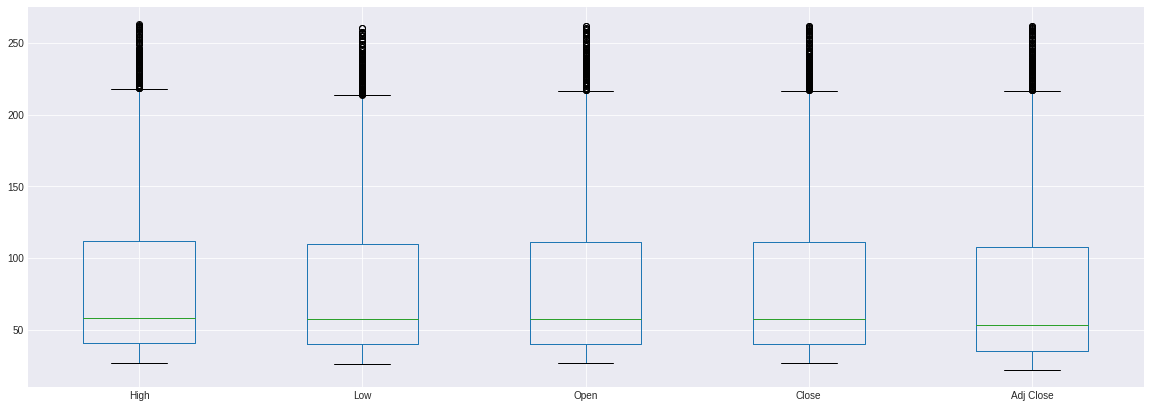

In [31]:
import seaborn as sns
plt.figure(figsize=(20,7))
boxplot = data.boxplot(column=['High', 'Low', 'Open','Close','Adj Close'])

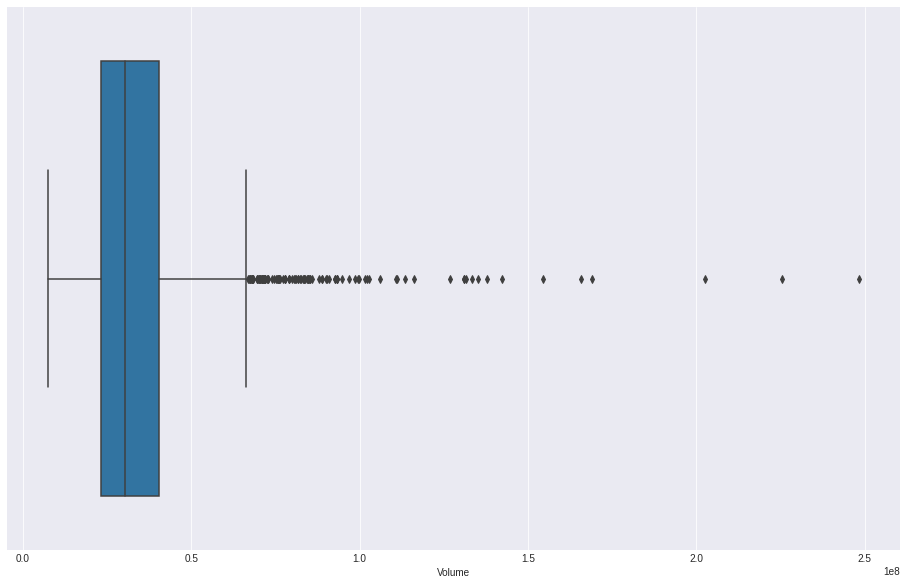

In [32]:
d = pd.DataFrame(data)
import seaborn as sns
sns.boxplot(x=d['Volume'])

This shows that the volume column contains lot of outlier values which might affect the results of prediction. Hence we remove the volume column itself as part of outlier elimination.

2. Visualization of Adjusted Close Price vs Data

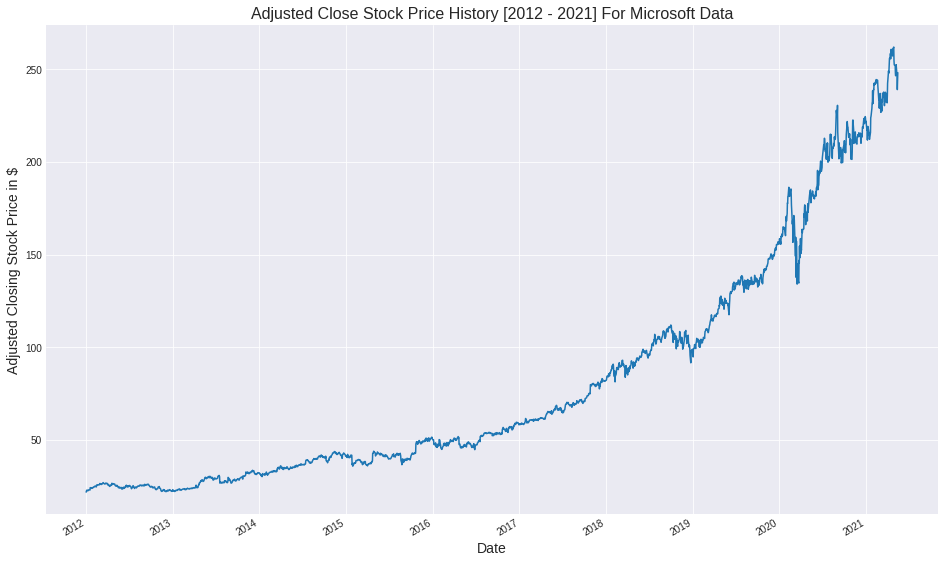

In [33]:
import matplotlib.dates as mdates

years = mdates.YearLocator() # Get every year
yearsFmt = mdates.DateFormatter('%Y') # Set year format

# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
ax.plot(df['Date'], df['Adj Close'])

# Format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)

# Set figure title
plt.title('Adjusted Close Stock Price History [2012 - 2021] For Microsoft Data', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Adjusted Closing Stock Price in $', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

3. CORRELATION BETWEEN VARIABLES

Text(0.5, 1.0, 'Correlation between features')

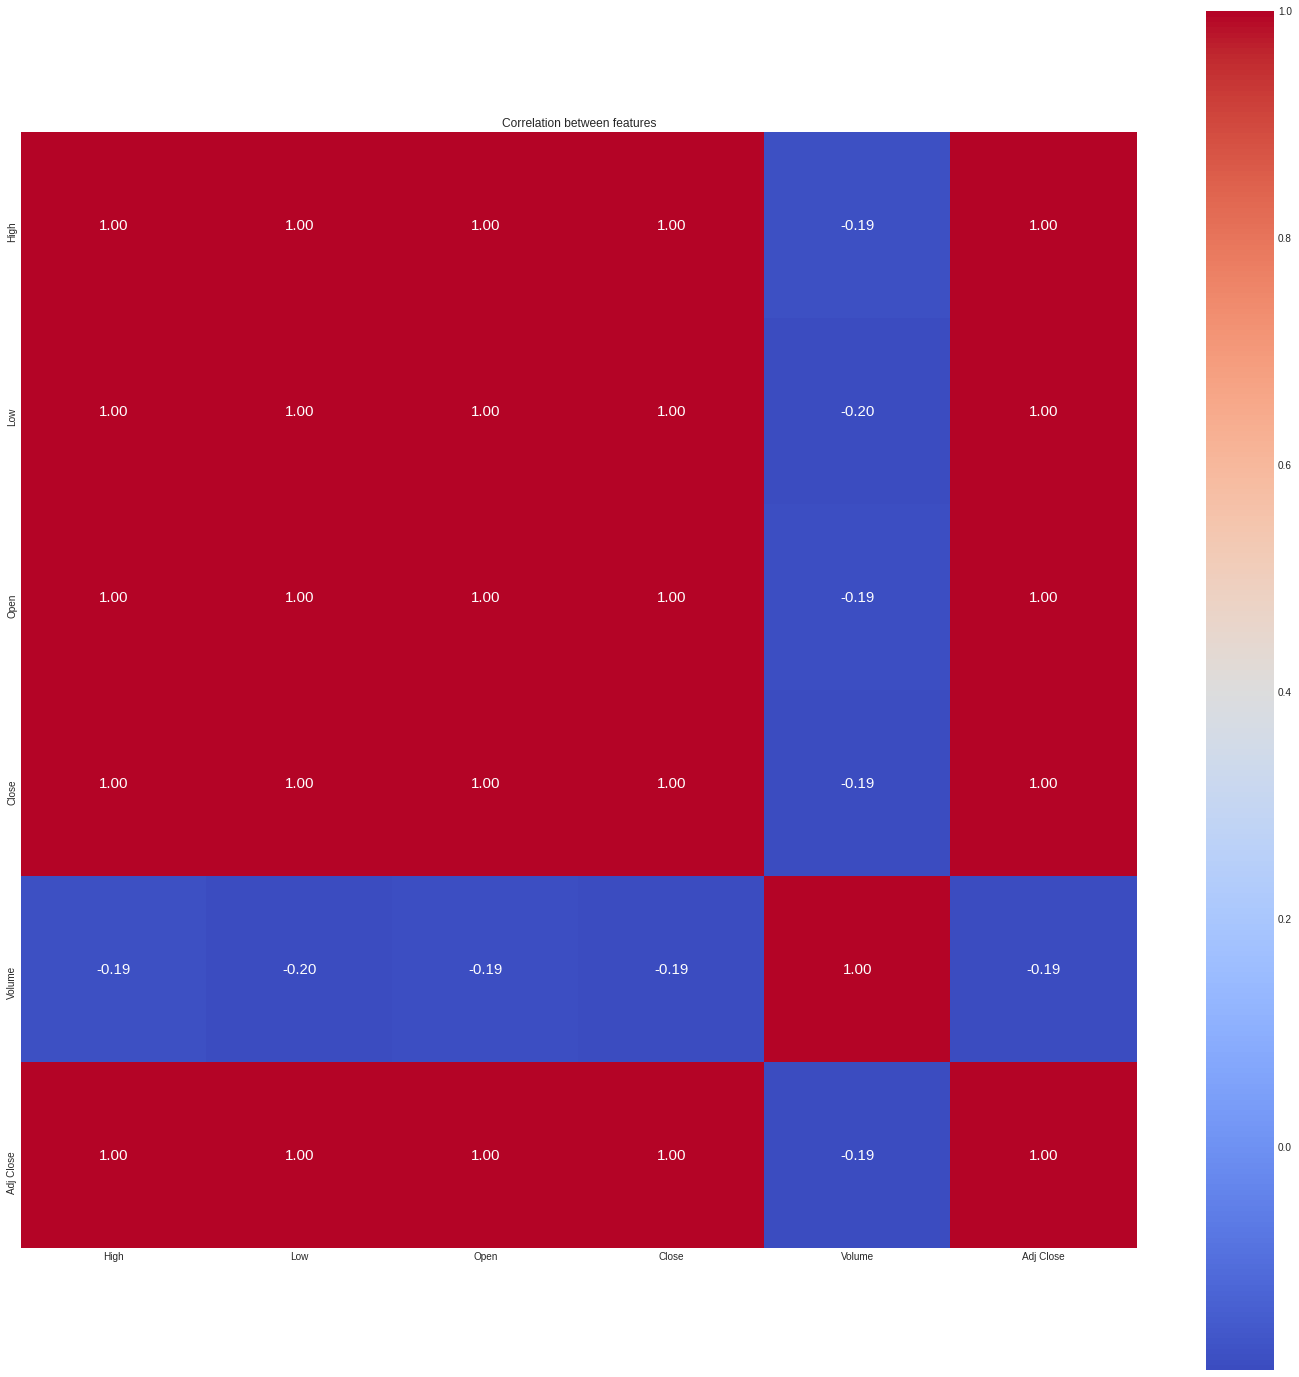

In [34]:
correlation=data.corr()

plt.figure(figsize=(25, 25))
sns.heatmap(correlation, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm')
plt.title('Correlation between features')

**PREDICTING THE ACCURACY OF PREDICTION OF STOCK PRICES USING ML AND DEEP LEARNING**

1. PREDICTION USING LINEAR REGRESSION

In [35]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.20)
from sklearn.linear_model import LinearRegression
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['Adj Close']
model = LinearRegression()
# Fit linear model using the train data set
model.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
print('Slope: ', np.asscalar(np.squeeze(model.coef_)))
# The Intercept
print('Intercept: ', model.intercept_)

Slope:  0.08130334679264983
Intercept:  -15.350311899662472


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  """Entry point for launching an IPython kernel.


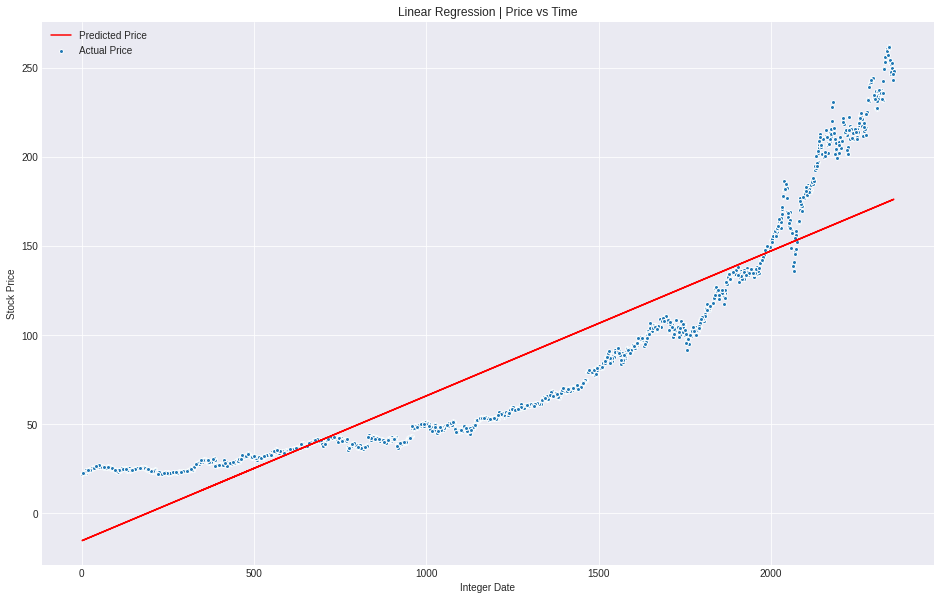

In [38]:
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.scatter(X_train, y_train, edgecolor='w', label='Actual Price')
plt.plot(X_train, model.predict(X_train), color='r', label='Predicted Price')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [39]:
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Adj Close']
y_pred = model.predict(X_test)
dfr=pd.DataFrame({'Actual Price':y_test,'Predicted Price':y_pred})
print(dfr)

      Actual Price  Predicted Price
1383     64.521713        97.092217
1821    116.284180       132.703083
1697    111.988419       122.621468
809      38.293133        50.424096
1397     69.661140        98.230464
...            ...              ...
1535     81.295418       109.450325
1927    135.639877       141.321237
488      32.445545        24.325721
1855    123.775154       135.467396
1853    126.432663       135.304790

[472 rows x 2 columns]


1.1 Calculating the accuracy of the prediction

In [40]:
from sklearn import metrics
import math
rmse_linear=math.sqrt(metrics.mean_squared_error(y_test,y_pred))
accuracy_linear=model.score(X_test,y_test)

print("Root mean square error= ",rmse_linear)
print("Accuracy Score= ",accuracy_linear*100)

Root mean square error=  27.427243291799382
Accuracy Score=  81.34730363661639


1.2 Graphichal prediction 

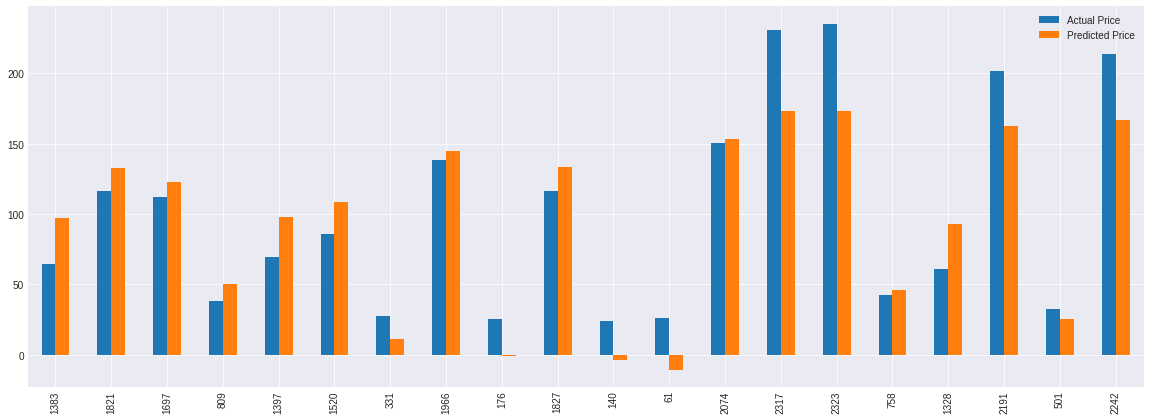

In [41]:
graph=dfr.head(20)
graph.plot(kind='bar',figsize=(20,7))

2.PREDICTION USING KNN

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
train, test = train_test_split(df, test_size=0.20)
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['Adj Close']
model = KNeighborsRegressor()
model.fit(X_train, y_train)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [43]:
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Adj Close']
y_pred = model.predict(X_test)
dfr=pd.DataFrame({'Actual Price':y_test,'Predicted Price':y_pred})
print(dfr)

      Actual Price  Predicted Price
675      41.254391        40.933801
2062    134.057693       149.510672
14       23.892059        23.825284
580      34.687897        34.997311
76       26.328053        26.014935
...            ...              ...
1395     70.247955        69.717917
542      32.836590        33.055624
1693    110.864746       110.097565
396      26.925817        26.939424
1930    137.794601       135.071173

[472 rows x 2 columns]


2.1 Calculating the Accuracy

In [44]:
from sklearn import metrics
import math
rmse_knn=math.sqrt(metrics.mean_squared_error(y_test,y_pred))
accuracy_knn=model.score(X_test,y_test) #Accuracy Score

print("Root mean square error= ",rmse_knn)
print("Accurcy Score= ",accuracy_knn*100)

Root mean square error=  1.7512739821987657
Accurcy Score=  99.91362489291325


2.2 Graphical Representation

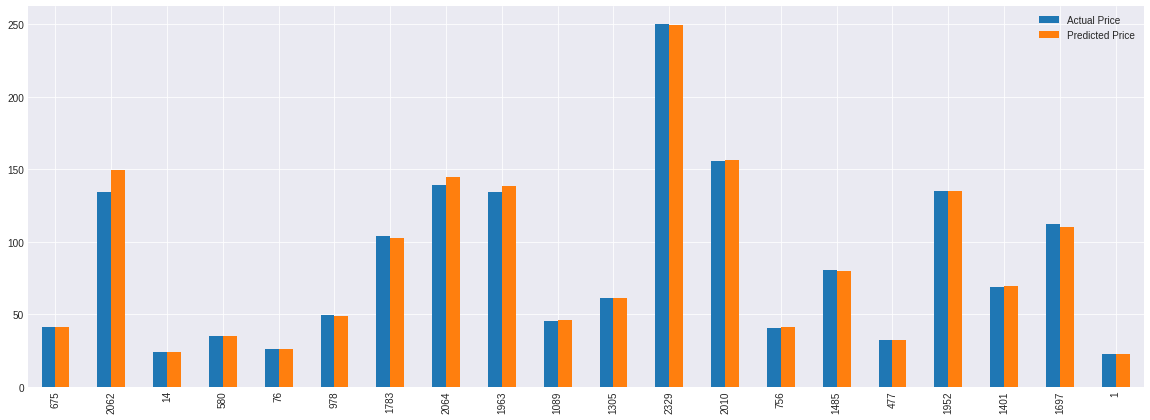

In [45]:
graph=dfr.head(20)
graph.plot(kind='bar',figsize=(20,7))

3.PREDICTION USING DECISION TREE REGRESSOR

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
train, test = train_test_split(df, test_size=0.20)
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['Adj Close']
model =DecisionTreeRegressor ()
model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [47]:
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Adj Close']
y_pred = model.predict(X_test)
dfr=pd.DataFrame({'Actual Price':y_test,'Predicted Price':y_pred})
print(dfr)

      Actual Price  Predicted Price
1644    102.237595       101.234032
876      39.862663        39.665024
819      36.972065        37.070248
1728    103.590004       103.522209
1716    103.609390       104.907417
...            ...              ...
661      39.589779        39.924461
11       22.898594        22.988161
1054     48.755386        48.663696
1584     91.275635        92.342125
785      38.855484        38.900116

[472 rows x 2 columns]


3.1 Calculating the Accuracy

In [48]:
from sklearn import metrics
import math
rmse_dt=math.sqrt(metrics.mean_squared_error(y_test,y_pred))
accuracy_dt=model.score(X_test,y_test) #Accuracy Score

print("Root mean square error= ",rmse_dt)
print("Accurcy Score= ",accuracy_dt*100)

Root mean square error=  1.7522608977057978
Accurcy Score=  99.90783312799248


3.2 Graphical Representation

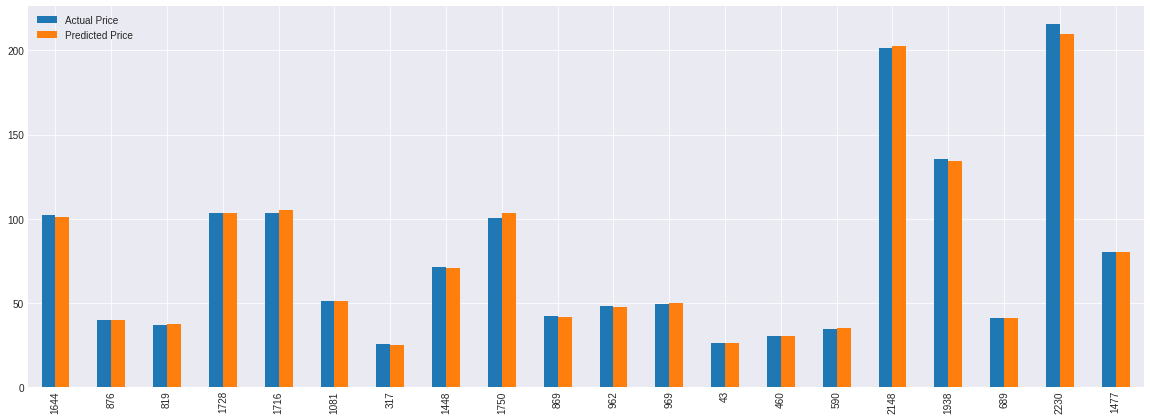

In [49]:
graph=dfr.head(20)
graph.plot(kind='bar',figsize=(20,7))

4.PREDICTION USING LASSO

In [50]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.20)
from sklearn.linear_model import Lasso
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['Adj Close']
model = Lasso()
# Fit linear model using the train data set
model.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [51]:
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Adj Close']
y_pred = model.predict(X_test)
dfr=pd.DataFrame({'Actual Price':y_test,'Predicted Price':y_pred})
print(dfr)

      Actual Price  Predicted Price
1507     81.974380       108.495176
968      49.666317        63.902652
242      22.867931         3.839252
1733     98.949486       127.192598
696      40.382442        41.399560
...            ...              ...
318      24.433447        10.126881
2172    213.527893       163.511927
2146    206.520721       161.360896
338      27.574162        11.781520
750      42.436348        45.867086

[472 rows x 2 columns]


4.1 Calculating the Accuracy

In [53]:
from sklearn import metrics
import math
rmse_lasso=math.sqrt(metrics.mean_squared_error(y_test,y_pred))
accuracy_lasso=model.score(X_test,y_test) #Accuracy Score

print("Root mean square error= ",rmse_lasso)
print("Accurcy Score= ",accuracy_lasso*100)

Root mean square error=  25.8734416225507
Accurcy Score=  79.26448975785706


4.2 Graphical Representation

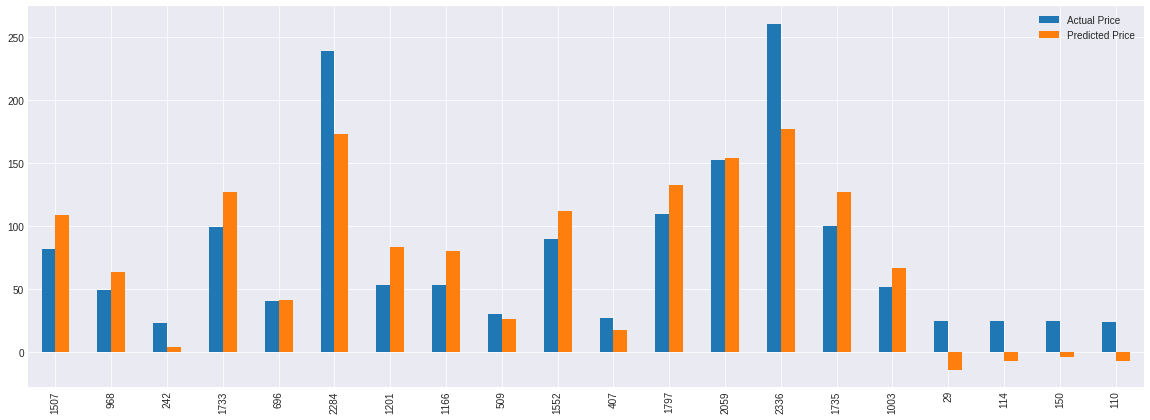

In [54]:
graph=dfr.head(20)
graph.plot(kind='bar',figsize=(20,7))

5. PREDICTION USING ELASTIC NET

In [55]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.20)
from sklearn.linear_model import ElasticNet
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['Adj Close']
model = ElasticNet()
# Fit linear model using the train data set
model.fit(X_train, y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [56]:
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Adj Close']
y_pred = model.predict(X_test)
dfr=pd.DataFrame({'Actual Price':y_test,'Predicted Price':y_pred})
print(dfr)

      Actual Price  Predicted Price
186      25.048542         0.327761
1258     58.538418        87.765892
1004     51.266594        67.048275
1542     89.085037       110.930472
286      23.107924         8.484303
...            ...              ...
305      23.850889        10.034046
505      31.410315        26.347130
1245     58.912594        86.705542
2292    243.928192       172.104538
251      22.817688         5.629513

[472 rows x 2 columns]


5.1 Calculating the Accuracy

In [57]:
from sklearn import metrics
import math
rmse_el=math.sqrt(metrics.mean_squared_error(y_test,y_pred))
accuracy_el=model.score(X_test,y_test) #Accuracy Score

print("Root mean square error= ",rmse_el)
print("Accurcy Score= ",accuracy_el*100)

Root mean square error=  25.86212337326192
Accurcy Score=  80.83927862295064


5.2 Graphical Representation

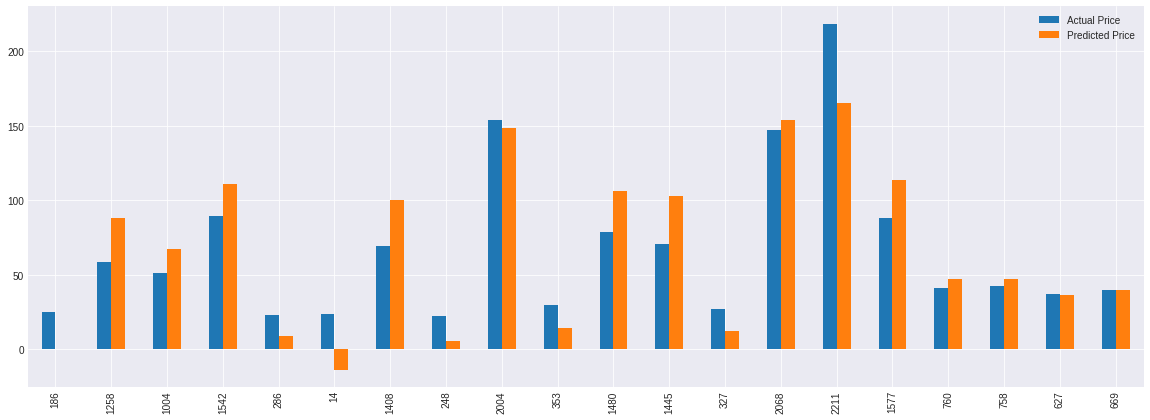

In [58]:
graph=dfr.head(20)
graph.plot(kind='bar',figsize=(20,7))

6. PREDICTION USING LSTM STACKED ESTIMATOR

In [59]:
df1=data.reset_index()['Adj Close']

In [60]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [61]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size:],df1[training_size:len(df1),:1]

In [62]:
import numpy

def create_dataset(dataset,time_step=1):
  dataX,dataY=[],[]
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i+time_step,0])
  return numpy.array(dataX),numpy.array(dataY)

In [63]:
 time_step=100
 X_train,y_train=create_dataset(train_data,time_step)
 X_test,ytest=create_dataset(train_data,time_step)

In [64]:
print(X_train)

[[0.         0.00213605 0.00308541 ... 0.01146853 0.00923561 0.00909817]
 [0.00213605 0.00308541 0.00454335 ... 0.00923561 0.00909817 0.00906384]
 [0.00308541 0.00454335 0.00328882 ... 0.00909817 0.00906384 0.01078147]
 ...
 [0.20003557 0.20375975 0.2023335  ... 0.27687097 0.28375935 0.28320191]
 [0.20375975 0.2023335  0.20542375 ... 0.28375935 0.28320191 0.27850345]
 [0.2023335  0.20542375 0.20510685 ... 0.28320191 0.27850345 0.28754202]]


In [65]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test =X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [67]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [68]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [69]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
23/23 [==============================] - 11s 271ms/step - loss: 0.0053 - val_loss: 3.8848e-04
Epoch 2/100
23/23 [==============================] - 5s 210ms/step - loss: 1.8069e-04 - val_loss: 8.6433e-05
Epoch 3/100
23/23 [==============================] - 5s 206ms/step - loss: 6.4262e-05 - val_loss: 4.2501e-05
Epoch 4/100
23/23 [==============================] - 5s 206ms/step - loss: 4.0289e-05 - val_loss: 4.5383e-05
Epoch 5/100
23/23 [==============================] - 5s 211ms/step - loss: 4.6652e-05 - val_loss: 4.5082e-05
Epoch 6/100
23/23 [==============================] - 5s 211ms/step - loss: 4.2993e-05 - val_loss: 4.0323e-05
Epoch 7/100
23/23 [==============================] - 5s 209ms/step - loss: 4.4001e-05 - val_loss: 4.1053e-05
Epoch 8/100
23/23 [==============================] - 5s 212ms/step - loss: 4.8367e-05 - val_loss: 3.9038e-05
Epoch 9/100
23/23 [==============================] - 5s 212ms/step - loss: 3.8191e-05 - val_loss: 3.8741e-05
Epoch 10/100
23/23 [==

In [70]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [71]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

6.1 Calculating the Accuracy

In [72]:
import math
from sklearn.metrics import mean_squared_error
rmse_lstm=math.sqrt(mean_squared_error(ytest,test_predict))
print("RMSE score of LSTM =",rmse_lstm)


RMSE score of LSTM = 46.749862824985215


7.PREDICTION USING FBPROPHET

In [73]:
import datetime as dt
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
from fbprophet import Prophet

In [74]:
model=Prophet()

In [75]:
dfb=data.reset_index()

In [76]:
dfb

,Date,High,Low,Open,Close,Volume,Adj Close
0,2012-01-03,26.959999,26.389999,26.549999,26.770000,64731500.0,21.799267
1,2012-01-04,27.469999,26.780001,26.820000,27.400000,80516100.0,22.312283
2,2012-01-05,27.730000,27.290001,27.379999,27.680000,56081400.0,22.540291
3,2012-01-06,28.190001,27.530001,27.530001,28.110001,99455500.0,22.890448
4,2012-01-09,28.100000,27.719999,28.049999,27.740000,59706800.0,22.589146
...,...,...,...,...,...,...,...
2352,2021-05-10,251.729996,247.119995,250.869995,247.179993,29299900.0,247.179993
2353,2021-05-11,246.600006,242.570007,244.550003,246.229996,33641600.0,246.229996
2354,2021-05-12,244.380005,238.070007,242.169998,239.000000,36684400.0,239.000000
2355,2021-05-13,245.600006,241.419998,241.800003,243.029999,29624300.0,243.029999


In [77]:
dfb[['ds','y']]=dfb[['Date','Adj Close']]

In [78]:
dfb

,Date,High,Low,Open,Close,Volume,Adj Close,ds,y
0,2012-01-03,26.959999,26.389999,26.549999,26.770000,64731500.0,21.799267,2012-01-03,21.799267
1,2012-01-04,27.469999,26.780001,26.820000,27.400000,80516100.0,22.312283,2012-01-04,22.312283
2,2012-01-05,27.730000,27.290001,27.379999,27.680000,56081400.0,22.540291,2012-01-05,22.540291
3,2012-01-06,28.190001,27.530001,27.530001,28.110001,99455500.0,22.890448,2012-01-06,22.890448
4,2012-01-09,28.100000,27.719999,28.049999,27.740000,59706800.0,22.589146,2012-01-09,22.589146
...,...,...,...,...,...,...,...,...,...
2352,2021-05-10,251.729996,247.119995,250.869995,247.179993,29299900.0,247.179993,2021-05-10,247.179993
2353,2021-05-11,246.600006,242.570007,244.550003,246.229996,33641600.0,246.229996,2021-05-11,246.229996
2354,2021-05-12,244.380005,238.070007,242.169998,239.000000,36684400.0,239.000000,2021-05-12,239.000000
2355,2021-05-13,245.600006,241.419998,241.800003,243.029999,29624300.0,243.029999,2021-05-13,243.029999


In [79]:
model.fit(dfb)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [81]:
prediction=model.make_future_dataframe(periods=200)

In [82]:
pre=model.predict(prediction)
print(pre)

             ds       trend  ...  multiplicative_terms_upper        yhat
0    2012-01-03   25.220761  ...                         0.0   23.952509
1    2012-01-04   25.212488  ...                         0.0   23.832262
2    2012-01-05   25.204216  ...                         0.0   23.710011
3    2012-01-06   25.195944  ...                         0.0   23.677610
4    2012-01-09   25.171127  ...                         0.0   23.340558
...         ...         ...  ...                         ...         ...
2552 2021-11-26  286.423481  ...                         0.0  286.645494
2553 2021-11-27  286.609178  ...                         0.0  284.260344
2554 2021-11-28  286.794876  ...                         0.0  284.371806
2555 2021-11-29  286.980574  ...                         0.0  286.860954
2556 2021-11-30  287.166271  ...                         0.0  287.052267

[2557 rows x 19 columns]


7.1 Calclulating the Accuracy

In [83]:
import math
from sklearn.metrics import mean_squared_error
rmse_fb=math.sqrt(mean_squared_error(pre['trend'],pre['yhat']))
print("RMSE error of FBProphet =",rmse_fb)

RMSE error of FBProphet = 1.7721375811220887


7.2 Graphical Visualization

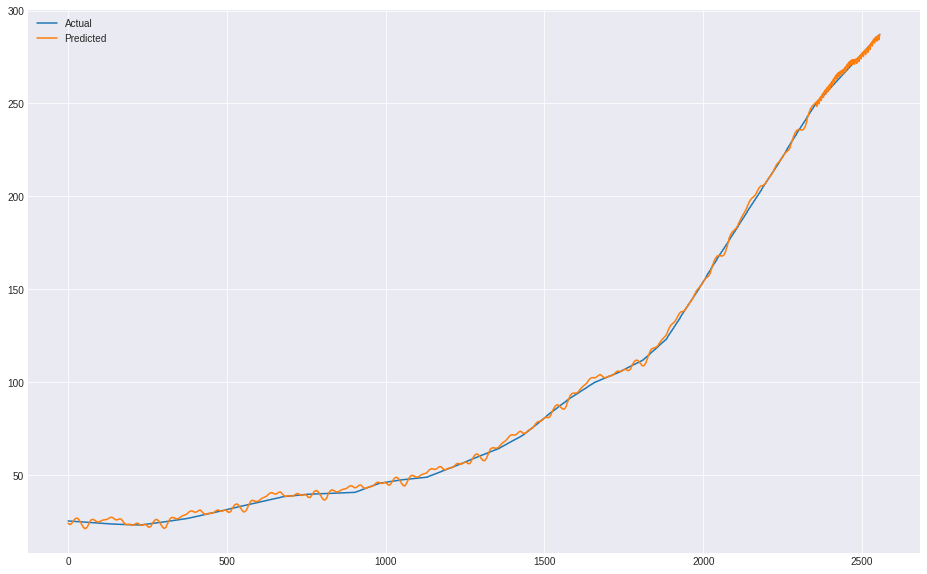

In [84]:
from matplotlib import pyplot
pyplot.plot(pre['trend'], label='Actual')
pyplot.plot(pre['yhat'], label='Predicted')
pyplot.legend()
pyplot.show()

**Evaluation of the Performance of Algorithms**

1. BASED ON THE ACCURACY SCORE

In [85]:
scores = [accuracy_linear*100,accuracy_lasso*100,accuracy_knn*100,accuracy_el*100,accuracy_dt*100]
algorithms = ["Linear Regression","Lasso Regression","KNN","ElasticNet","Decision Tree Regressor"]
for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Linear Regression is: 81.34730363661639 %
The accuracy score achieved using Lasso Regression is: 79.26448975785706 %
The accuracy score achieved using KNN is: 99.91362489291325 %
The accuracy score achieved using ElasticNet is: 80.83927862295064 %
The accuracy score achieved using Decision Tree Regressor is: 99.90783312799248 %


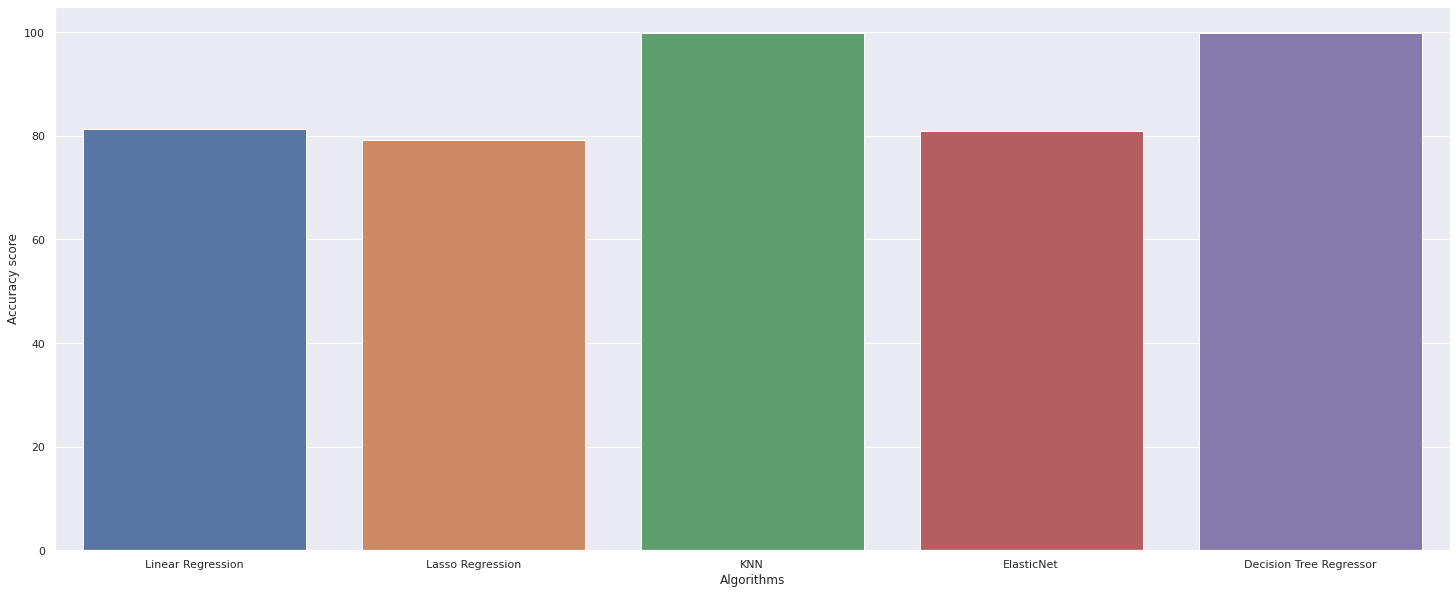

In [86]:
sns.set(rc={'figure.figsize':(25,10)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

2. BASED ON RMSE VALUES

In [88]:
scores = [rmse_linear,rmse_lasso,rmse_knn,rmse_el,rmse_dt,rmse_lstm,rmse_fb]
algorithms = ["Linear Regression","Lasso Regression","KNN","ElasticNet","Decision Tree Regressor","LSTM","FB PROPHET"]
for i in range(len(algorithms)):
    print("The RMSE Value achieved using "+algorithms[i]+" is: "+str(scores[i])+" ")

The RMSE Value achieved using Linear Regression is: 27.427243291799382 
The RMSE Value achieved using Lasso Regression is: 25.8734416225507 
The RMSE Value achieved using KNN is: 1.7512739821987657 
The RMSE Value achieved using ElasticNet is: 25.86212337326192 
The RMSE Value achieved using Decision Tree Regressor is: 1.7522608977057978 
The RMSE Value achieved using LSTM is: 46.749862824985215 
The RMSE Value achieved using FB PROPHET is: 1.7721375811220887 


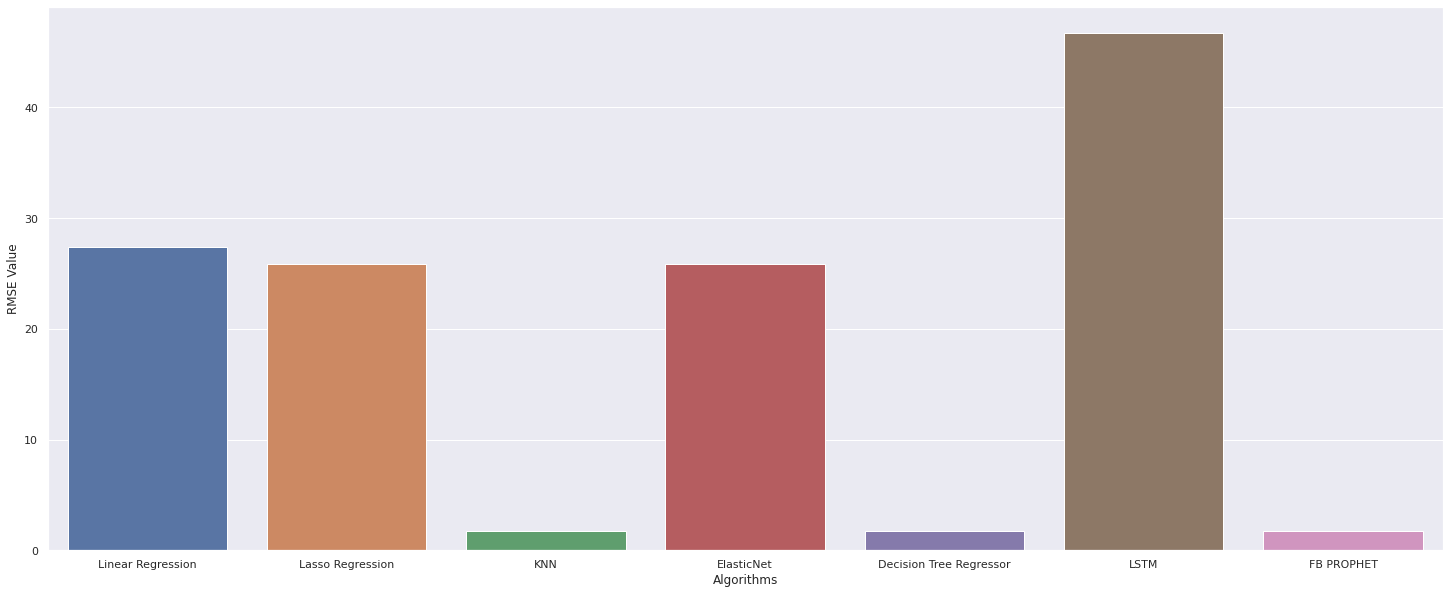

In [89]:
sns.set(rc={'figure.figsize':(25,10)})
plt.xlabel("Algorithms")
plt.ylabel("RMSE Value")

sns.barplot(algorithms,scores)

**FORECASTING THE FUTURE STOCK PRICES USING ML AND DEEP LEARNING**

In [ ]:
df=web.DataReader('AMZN',data_source='yahoo',start='2012-01-01',end='2021-05-15')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,179.479996,175.550003,175.889999,179.029999,5110800,179.029999
2012-01-04,180.500000,176.070007,179.210007,177.509995,4205200,177.509995
2012-01-05,178.250000,174.050003,175.940002,177.610001,3809100,177.610001
2012-01-06,184.649994,177.500000,178.070007,182.610001,7008400,182.610001
2012-01-09,184.369995,177.000000,182.759995,178.559998,5056900,178.559998
...,...,...,...,...,...,...
2021-05-10,3283.000000,3190.000000,3282.320068,3190.489990,5838600,3190.489990
2021-05-11,3238.000000,3127.370117,3136.280029,3223.909912,4619800,3223.909912
2021-05-12,3207.939941,3133.100098,3185.000000,3151.939941,4936400,3151.939941


1.FORECASTING USING LINEAR REGRESSION

In [ ]:
from sklearn import preprocessing
forecast = 30
df['Prediction'] = df[['Adj Close']].shift(-forecast)

X = np.array(df.drop(['Prediction'], 1))
X = preprocessing.scale(X)

X_forecast = X[-forecast:]
X = X[:-forecast]

y = np.array(df['Prediction'])
y = y[:-forecast]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LinearRegression()
clf.fit(X_train, y_train)

confidence_linear = clf.score(X_test, y_test)

forecast_predicted_linear = clf.predict(X_forecast)
print(forecast_predicted_linear)

[3319.59252078 3274.22168103 3376.3752668  3352.66208726 3471.37445351
 3440.83893957 3453.31443953 3436.00967228 3443.76498335 3471.65557837
 3467.67393498 3426.71641281 3443.58950253 3406.52563819 3424.73720775
 3519.57103973 3499.35536344 3536.27537227 3561.61535138 3568.4277315
 3519.29183972 3426.59931648 3382.5550734  3389.98087486 3348.97061333
 3300.46359642 3347.24774151 3243.12775114 3254.51638829 3286.40381302]


In [ ]:
print(confidence_linear*100)

98.25559175418526


(737450.0, 738110.7)

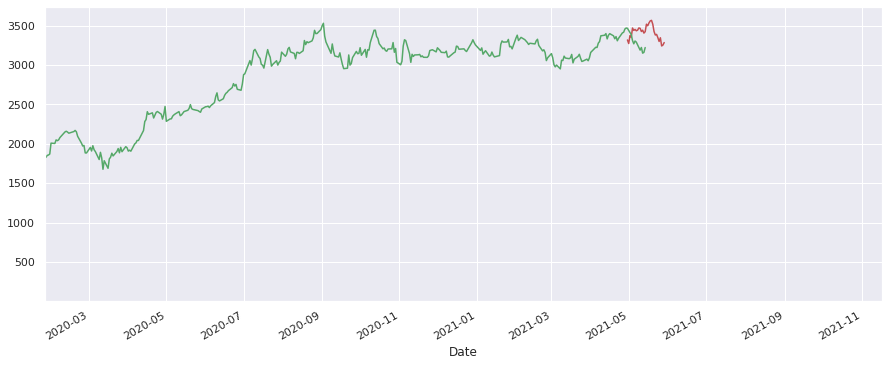

In [ ]:
dates = pd.date_range(start="2021-04-30", end="2021-05-29")
plt.plot(dates, forecast_predicted_linear,color='r')
df['Adj Close'].plot(figsize=(15,6),color='g')
plt.xlim(xmin=datetime.date(2020,1,26))

2. FORECASTING USING LASSO REGRESSION

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = Lasso()
clf.fit(X_train, y_train)

confidence_lasso = clf.score(X_test, y_test)

forecast_predicted_lasso= clf.predict(X_forecast)
print(forecast_predicted_lasso)

[3298.96903614 3309.49766928 3366.58325025 3387.7154011  3437.87343511
 3459.96620562 3496.33999362 3465.33919625 3461.7983863  3472.4764516
 3498.11215003 3445.47034794 3428.3365398  3434.12193936 3438.34617055
 3493.60854449 3524.02201829 3555.12262599 3579.24115825 3616.36266843
 3547.06938763 3429.69517057 3414.27042356 3378.65738162 3393.22266403
 3340.92577229 3300.70194696 3267.28566797 3264.07121892 3291.99074281]


In [ ]:
print(confidence_lasso*100)

98.32876134580675


(737450.0, 738110.7)

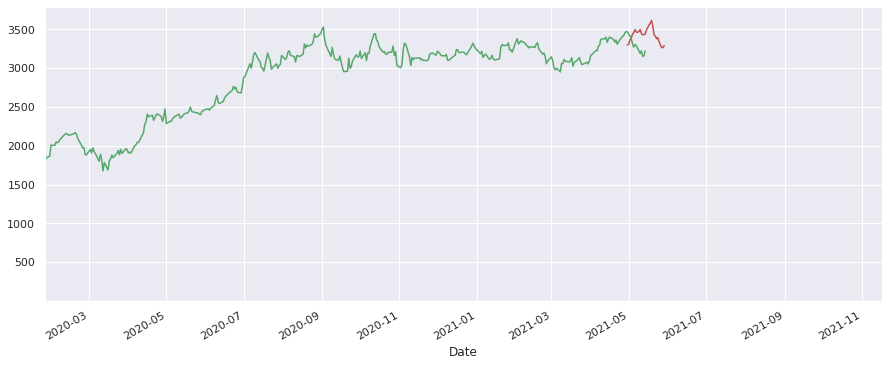

In [ ]:
dates = pd.date_range(start="2021-04-30", end="2021-05-29")
plt.plot(dates, forecast_predicted_lasso,color='r')
df['Adj Close'].plot(figsize=(15,6),color='g')
plt.xlim(xmin=datetime.date(2020,1,26))

3. FORECASTING USING ELASTIC NET

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = ElasticNet()
clf.fit(X_train, y_train)

confidence_elastic = clf.score(X_test, y_test)

forecast_predicted_elastic= clf.predict(X_forecast)
print(forecast_predicted_elastic)

[3091.29550809 3109.3613759  3146.29426116 3182.75407008 3222.23263099
 3246.42655679 3277.78875409 3234.69471519 3249.58910737 3261.1147953
 3257.42268796 3222.09124412 3214.15075595 3207.46502424 3213.43038845
 3264.06345562 3299.54530484 3326.58579794 3361.49166163 3373.77497263
 3303.03815011 3209.312779   3180.7623246  3173.30442636 3188.70543868
 3120.91489124 3081.98790837 3060.93483444 3058.21148122 3094.93148521]


In [ ]:
print(confidence_elastic*100)

97.3831062985231


(737450.0, 738110.7)

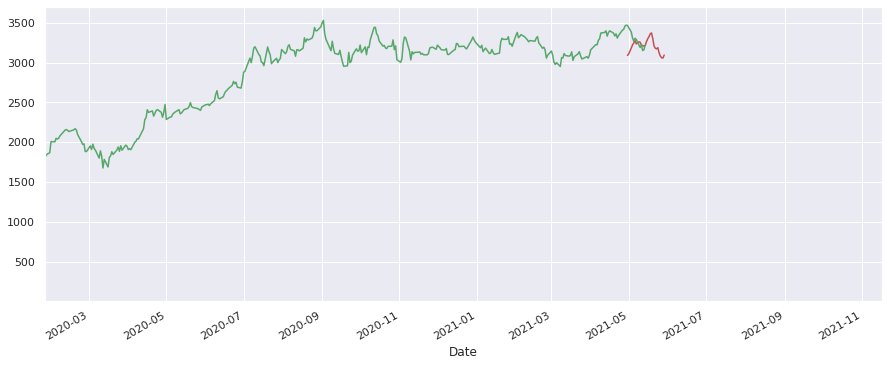

In [ ]:
dates = pd.date_range(start="2021-04-30", end="2021-05-29")
plt.plot(dates, forecast_predicted_elastic,color='r')
df['Adj Close'].plot(figsize=(15,6),color='g')
plt.xlim(xmin=datetime.date(2020,1,26))

4.FORECASTING USING KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = KNeighborsRegressor()
clf.fit(X_train, y_train)

confidence_knn = clf.score(X_test, y_test)

forecast_predicted_knn= clf.predict(X_forecast)
print(forecast_predicted_knn)

[3188.70400391 3204.36396484 3214.27998047 3102.85795898 3143.68798828
 3205.32998047 3266.54399414 3173.54594727 3205.32998047 3205.32998047
 3173.54594727 3123.06396484 3104.90795898 3123.06396484 3141.74399414
 3139.2        3308.70195312 3233.86992187 3145.07397461 3149.00800781
 3178.1340332  3146.22397461 3128.71401367 3145.25600586 3128.85400391
 3232.52202148 3227.99995117 3148.16396484 3170.47998047 3223.46401367]


In [ ]:
print(confidence_knn*100)

98.53161611057811


(737450.0, 738110.7)

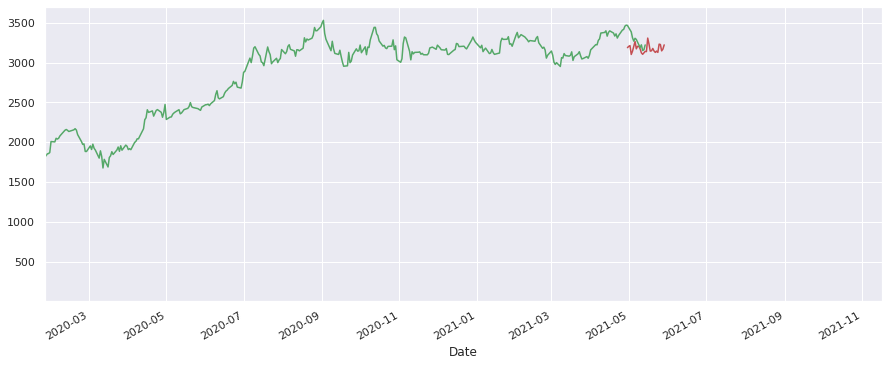

In [ ]:
dates = pd.date_range(start="2021-04-30", end="2021-05-29")
plt.plot(dates, forecast_predicted_knn,color='r')
df['Adj Close'].plot(figsize=(15,6),color='g')
plt.xlim(xmin=datetime.date(2020,1,26))

5.FORECASTING USING DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = DecisionTreeRegressor()
clf.fit(X_train, y_train)

confidence_dt = clf.score(X_test, y_test)

forecast_predicted_dt = clf.predict(X_forecast)
print(forecast_predicted_dt)

[3008.72998047 3203.5300293  3089.48999023 2951.94995117 3099.95996094
 3137.5        3442.92993164 3137.5        3137.5        3137.5
 3137.5        3137.5        3137.5        3099.95996094 3137.5
 3190.55004883 3286.64990234 3363.70996094 3363.70996094 3338.64990234
 3286.64990234 3201.64990234 3226.72998047 3125.         2951.94995117
 3312.5300293  3110.2800293  3256.92993164 3256.92993164 3008.72998047]


In [ ]:
print(confidence_dt*100)

97.65346615737917


(737450.0, 738110.7)

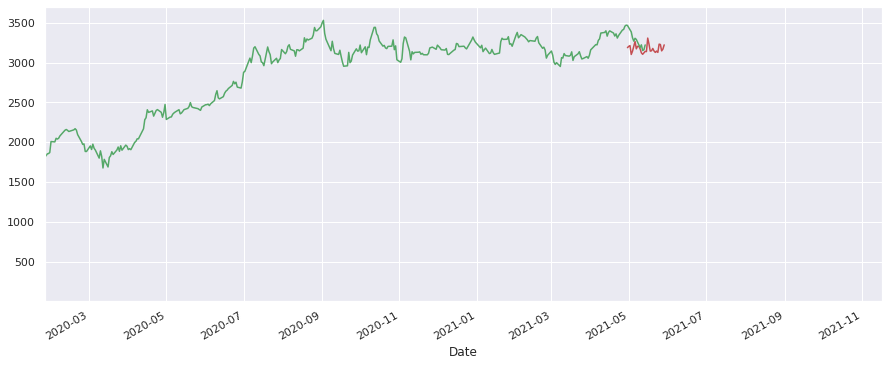

In [ ]:
dates = pd.date_range(start="2021-04-30", end="2021-05-29")
plt.plot(dates, forecast_predicted_knn,color='r')
df['Adj Close'].plot(figsize=(15,6),color='g')
plt.xlim(xmin=datetime.date(2020,1,26))

In [ ]:
compare=pd.DataFrame({'Linear Regression':forecast_predicted_linear,'Lasso':forecast_predicted_lasso,'Decision tree Regressor':forecast_predicted_dt,'Elastic Net':forecast_predicted_elastic,'K Neighbhors Regressor':forecast_predicted_knn})

In [ ]:
compare.head(20)

,Linear Regression,Lasso,Decision tree Regressor,Elastic Net,K Neighbhors Regressor
0,3319.592521,3298.969036,3008.729980,3091.295508,3188.704004
1,3274.221681,3309.497669,3203.530029,3109.361376,3204.363965
2,3376.375267,3366.583250,3089.489990,3146.294261,3214.279980
3,3352.662087,3387.715401,2951.949951,3182.754070,3102.857959
4,3471.374454,3437.873435,3099.959961,3222.232631,3143.687988
5,3440.838940,3459.966206,3137.500000,3246.426557,3205.329980
6,3453.314440,3496.339994,3442.929932,3277.788754,3266.543994
7,3436.009672,3465.339196,3137.500000,3234.694715,3173.545947
8,3443.764983,3461.798386,3137.500000,3249.589107,3205.329980
9,3471.655578,3472.476452,3137.500000,3261.114795,3205.329980


**EVALUATION OF PERFORMANCE IN FORECASTING**

In [ ]:
scores = [confidence_linear,confidence_lasso,confidence_knn,confidence_elastic,confidence_dt]
algorithms = ["Linear Regression","Lasso Regression","KNN","ElasticNet","Decision Tree Regressor"]
for i in range(len(algorithms)):
    print("The confidence scores achieved using "+algorithms[i]+" is: "+str(scores[i]*100)+"%")

The confidence scores achieved using Linear Regression is: 98.25559175418526%
The confidence scores achieved using Lasso Regression is: 98.32876134580675%
The confidence scores achieved using KNN is: 98.53161611057811%
The confidence scores achieved using ElasticNet is: 97.3831062985231%
The confidence scores achieved using Decision Tree Regressor is: 97.65346615737917%


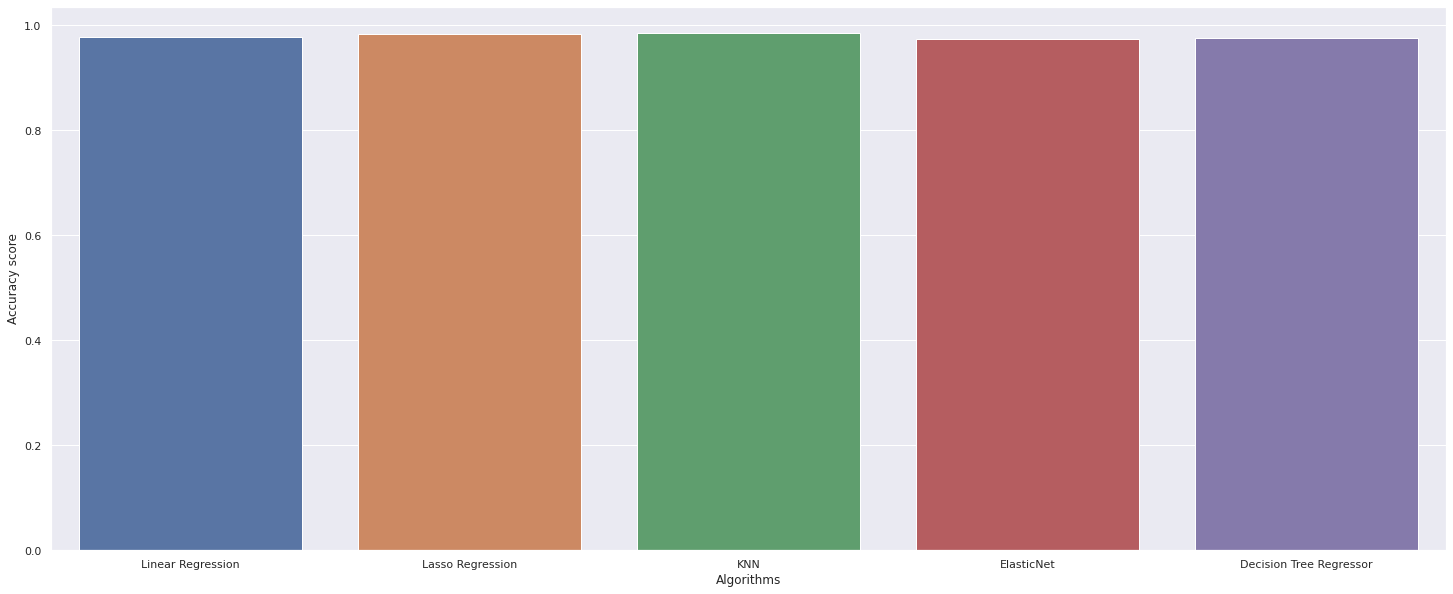

In [ ]:
sns.set(rc={'figure.figsize':(25,10)})
plt.xlabel("Algorithms")
plt.ylabel("Confidence Score")

sns.barplot(algorithms,scores)